# Graphs in NLP
---

by Vadim Alperovich, <br> 
LATNA Research Assistant <br>
2020

**Plan.**

1. **Motivation**

   - ACL 2019 + ACL 2020 
   - Intuition
   - Previous results/Gaps

2. **Graph-based Text Representations**<br>
  -  Graph-based document representation
  -  Syntax-based / dependency graph
  -  Knowledge Graphs
3. **Embedding representations of Graph structures** (Graph encodings)
 - Heuristic Graph Embeddings (RandomWalk, Node2Vec)
 - Knoweledge Graph Embeddings (TransE, TransR, TransH)
 - Neural Approach (GCN)
4. **Heterogeneous Information Fusion**: Incorporating Graph-based Information Into Embedding-based NLP Model
    - SynGCN (https://github.com/malllabiisc/WordGCN)
    - ERNIE (https://github.com/thunlp/ERNIE)

---

# 2. Graph-based Text Representations

## Syntax-based / dependency graph

In [ ]:
import os
from graphviz import Source
from IPython.display import Image, HTML
from stanfordnlp.server import CoreNLPClient
from nltk.parse.corenlp import CoreNLPDependencyParser

os.environ["CORENLP_HOME"] = "D:/LATNA/stanford-corenlp-full-2018-02-27/"
with CoreNLPClient() as client:
    dep_parser = CoreNLPDependencyParser(url=client.endpoint)
    parse, = dep_parser.raw_parse('Sometimes you need to close the door to open a window.')
    print(parse.to_conll(4)) 
# client.stop()

Starting server with command: java -Xmx5G -cp D:/LATNA/stanford-corenlp-full-2018-02-27//* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9000 -timeout 60000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-058ab0bff49d47f8.props -preload tokenize,ssplit,pos,lemma,ner,depparse
Sometimes	RB	3	advmod
you	PRP	3	nsubj
need	VBP	0	ROOT
to	TO	5	mark
close	VB	3	xcomp
the	DT	7	det
door	NN	5	dobj
to	TO	9	mark
open	VB	5	advcl
a	DT	11	det
window	NN	9	dobj
.	.	3	punct



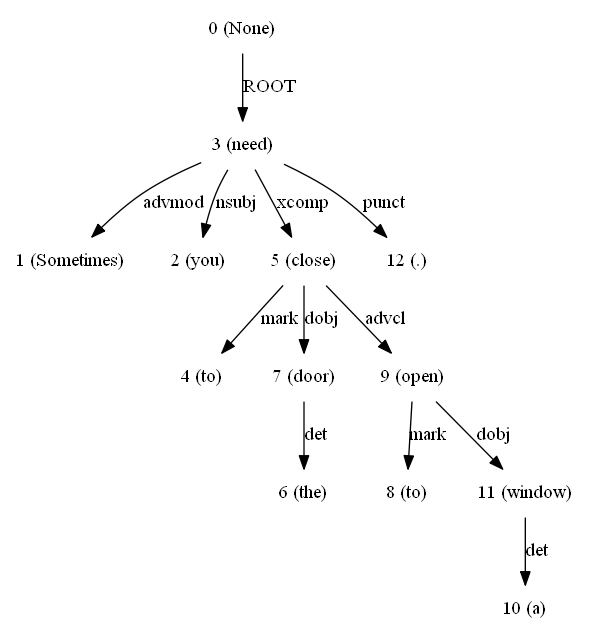

In [ ]:
source = Source(parse.to_dot(), filename="dep_tree_eng", format="png")
source.view()
Image('dep_tree_eng.png')

In [ ]:
sent = 'Князь Андрей несколько раз оглянулся на этот дуб, проезжая по лесу.'
with CoreNLPClient(properties={'depparse.model': 'edu/stanford/nlp/models/parser/nndep/nndep.rus.model.wiki.txt.gz'}) as client:
    dep_parser = CoreNLPDependencyParser(url=client.endpoint)
    parse, = dep_parser.raw_parse(sent)
    print(parse.to_conll(4)) 


Starting server with command: java -Xmx5G -cp D:/LATNA/stanford-corenlp-full-2018-02-27//* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9000 -timeout 60000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-8d203c743a264e4d.props -preload tokenize,ssplit,pos,lemma,ner,depparse
Князь	NNP	5	nsubj
Андрей	NNP	1	appos
несколько	NN	4	nummod:gov
раз	NN	5	obl
оглянулся	NN	0	ROOT
на	NN	8	case
этот	NN	8	amod
дуб	NN	5	obl
,	,	8	punct
проезжая	NN	5	acl
по	NN	12	case
лесу	NN	10	obl
.	.	12	punct



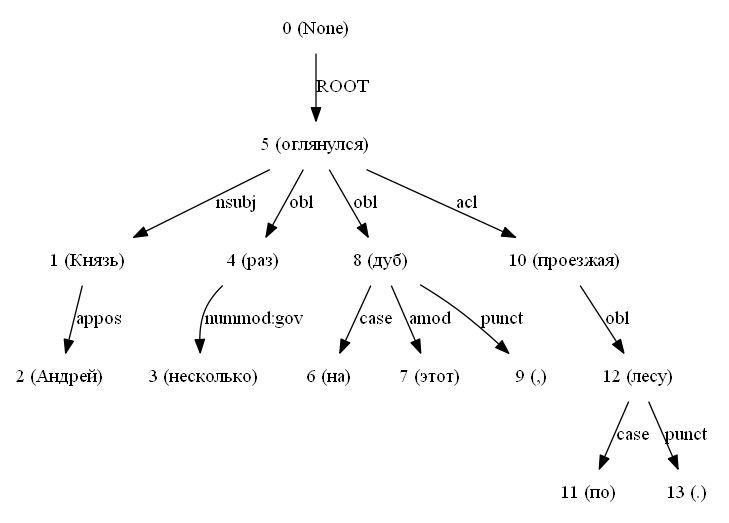

In [ ]:
client.stop()
source = Source(parse.to_dot(), filename="dep_tree_rus", format="png")
source.view()
Image('dep_tree_rus.png')

## Graph-based document representation

https://www.lix.polytechnique.fr/~kskianis/papers/tw-icw-w2v_textgraphs2018.pdf

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
 
sentence_1 = "John likes to watch movies. Mary likes movies too"

sentence_2 = "Mary also likes to watch football games"
 
 
 
# model = TfidfVectorizer(ngram_range=(1,1), 
#                            stop_words='english')
model = CountVectorizer(ngram_range=(1,1), 
                           stop_words='english')
Count_data = model.fit_transform([sentence_1,sentence_2])
 
cv_dataframe=pd.DataFrame(Count_data.toarray(), columns=model.get_feature_names())
print(cv_dataframe)

   football  games  john  likes  mary  movies  watch
0         0      0     1      2     1       2      1
1         1      1     0      1     1       0      1


In [ ]:
import urllib
import bs4 
import nltk  
import numpy as np  
import random  
import string
import re

raw_html = urllib.request.urlopen('https://en.wikipedia.org/wiki/Natural_language_processing')  
raw_html = raw_html.read()

article_html = bs4.BeautifulSoup(raw_html, 'lxml')

article_paragraphs = article_html.find_all('p')

article_text = ''

for para in article_paragraphs:  
    article_text += para.text

corpus = nltk.sent_tokenize(article_text)
for i in range(len(corpus )):
    corpus [i] = corpus [i].lower()
    corpus [i] = re.sub(r'\W',' ',corpus [i])
    corpus [i] = re.sub(r'\s+',' ',corpus [i])

In [ ]:
corpus[:1]

['natural language processing nlp is a subfield of linguistics computer science and artificial intelligence concerned with the interactions between computers and human language in particular how to program computers to process and analyze large amounts of natural language data ']

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer 

lemmatizer = WordNetLemmatizer()

for i, sentence in enumerate(corpus):
    word_list = nltk.word_tokenize(sentence)
    corpus[i] = ' '.join([lemmatizer.lemmatize(w) for w in word_list])

In [ ]:
corpus[:1]

['natural language processing nlp is a subfield of linguistics computer science and artificial intelligence concerned with the interaction between computer and human language in particular how to program computer to process and analyze large amount of natural language data']

In [ ]:
tf_idf_data = tfidf.fit_transform(corpus)
 
#create dataframe
cv_dataframe=pd.DataFrame(tf_idf_data.toarray(), columns=tfidf.get_feature_names())
freq_dct = list(zip(cv_dataframe.sum().index, cv_dataframe.sum().values))
freq_dct.sort(key=lambda x: x[1])

In [ ]:
# freq_dct[::-1]

In [ ]:
import string 
from nltk.corpus import stopwords
import networkx as nx

stop_words = stopwords.words('english')
maxint = 1000


wordList1 = [nltk.word_tokenize(x) for x in corpus]
wordList2 = []
for sent in wordList1:
    sent = [x for x in sent if x not in stop_words]
    wordList2 += sent


        
def doc_to_graph(words):
    dG = nx.DiGraph()

    for i, word in enumerate(words):
        try:
            next_word = words[i + 1]
            if not dG.has_node(word):
                dG.add_node(word)
                dG.nodes[word]['count'] = 1
            else:
                dG.nodes[word]['count'] += 1
            if not dG.has_node(next_word):
                dG.add_node(next_word)
                dG.nodes[next_word]['count'] = 0

            if not dG.has_edge(word, next_word):
                dG.add_edge(word, next_word, weight=1)
            else:
                dG[word][next_word]['weight'] += 1
        except IndexError:
            if not dG.has_node(word):
                dG.add_node(word)
                dG.node[word]['count'] = 1
            else:
                dG.nodes[word]['count'] += 1
        except:
            raise
    return dG

In [ ]:
dG = doc_to_graph(wordList2)
elarge = [(u, v) for (u, v, d) in dG.edges(data=True) if d["weight"] >= 0.2]

In [ ]:
[x for x in corpus if 'author' in x]

['27 george lakoff offer a methodology to build natural language processing nlp algorithm through the perspective of cognitive science along with the finding of cognitive linguistics 28 the first defining aspect of this cognitive task of nlp is the application of the theory of conceptual metaphor explained by lakoff a the understanding of one idea in term of another which provides an idea of the intent of the author',
 'when used a a comparative a in that is a big tree a likely inference of the intent of the author is that the author is using the word big to imply a statement about the tree being physically large in comparison to other tree or the author experience',
 'when used a a stative verb a in tomorrow is a big day a likely inference of the author s intent it that big is being used to imply importance']

In [ ]:
from pyvis import network as pynet
net = pynet.Network(notebook=True, height="450px", width="100%")#, bgcolor="#222222", font_color="white",)
# net.show_buttons(filter_=['physics'])
for edge in  dG.edges(data=True) :
      if min(dG.nodes[edge[0]]['count'], dG.nodes[edge[1]]['count']) >= 5:
#         print(edge)
        net.add_node(edge[0], edge[0], title=edge[0], value=dG.nodes[edge[0]]['count'])
        net.add_node(edge[1], edge[1], title=edge[1], value=dG.nodes[edge[1]]['count'])
        net.add_edge(edge[0], edge[1], value=edge[-1]["weight"])
net.hrepulsion()
net.show("example.html")       

In [10]:
rus_text =  open('tolstoy.txt','r+', encoding="utf8")

In [11]:
rus_text = ''.join(rus_text.readlines())

In [15]:
rus_text[:140]

'На краю дороги стоял дуб. Он был, вероятно, в десять раз старше берез, составлявших лес, в десять раз толще и в два раза выше каждой березы.'

In [ ]:
import copy
import nltk
import pymorphy2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from nltk.corpus import wordnet
from nltk import RegexpTokenizer
from nltk.corpus import stopwords


morph = pymorphy2.MorphAnalyzer()
def clean_and_tokenize(data):
    a = ord('а')
    abc_rus = ''.join([chr(i) for i in range(a,a+32)])
    abc_rus += abc_rus.upper()

    tokenizer = RegexpTokenizer(r'\w+')
    stopword  = stopwords.words('russian') + ['это', 'свой', 'который']
    tokenized = tokenizer.tokenize(data)# [tokenizer.tokenize(comment) for comment in data]
#     return tokenized 
    tmp_words = [token.lower() for token in tokenized if token.lower() not in stopword]
    words = []
    for word in tmp_words:
        flag = True
        for char in word:
            if char not in abc_rus:
                flag = False
                break
        if flag:
            parsed = morph.parse(word)
            if ( ('NOUN' in parsed[0].tag) and #  or 'VERB' in parsed[0].tag) and
                 'Name' not in parsed[0].tag and
                 'Surn' not in parsed[0].tag and
                 'Patr' not in parsed[0].tag):
                words.append(parsed[0].normal_form)
    return words


In [ ]:
clean_rus_text = clean_and_tokenize(rus_text)

In [ ]:
G = doc_to_graph(clean_rus_text)

In [ ]:
# net = pynet.Network(notebook=False, height="800px", width="100%",  bgcolor="#222222", font_color="white")
net = pynet.Network(notebook=False, height="800px", width="100%")
net.show_buttons()

for edge in  G.edges(data=True):
      if min(G.nodes[edge[0]]['count'], G.nodes[edge[1]]['count']) >= 2:
#       if edge[-1]['weight'] >= 1:
        net.add_node(edge[0], edge[0], title=edge[0], value=G.nodes[edge[0]]['count'])
        net.add_node(edge[1], edge[1], title=edge[1], value=G.nodes[edge[1]]['count'])
        net.add_edge(edge[0], edge[1], value=edge[-1]["weight"])
# net.hrepulsion()
# net.barnes_hut()
net.show("example.html")       

![](img/graph_doc3_occ_ge_1.png)

## Knowledge graphs 

In [ ]:
import wikipediaapi  
import pandas as pd
import spacy
import neuralcoref


# nlp = English()
# nlp.add_pipe(nlp.create_pipe('sentencizer'))
nlp = spacy.load('en_core_web_sm')
# neuralcoref.add_to_pipe(nlp)


def entity_pairs(text, coref=False):
    text = text.replace('\n','')
    text = nlp(text)
    if coref:
        text = nlp(text._.coref_resolved)  # resolve coreference clusters
    sentences = [sent.string.strip() for sent in text.sents]  # split text into sentences
    ent_pairs = list()
    for sent in sentences:
        sent = nlp(sent)
        spans = list(sent.ents) + list(sent.noun_chunks)  # collect nodes
        spans = spacy.util.filter_spans(spans)
        with sent.retokenize() as retokenizer:
            [retokenizer.merge(span) for span in spans]
        dep = [token.dep_ for token in sent]
        if (dep.count('obj')+dep.count('dobj'))==1 \
                and (dep.count('subj')+dep.count('nsubj'))==1:
            for token in sent:
                if token.dep_ in ('obj', 'dobj'):  # identify object nodes
                    subject = [w for w in token.head.lefts if w.dep_
                               in ('subj', 'nsubj')]  # identify subject nodes
                    if subject:
                        subject = subject[0]
                        relation = [w for w in token.ancestors if w.dep_ == 'ROOT']
                        if relation:
                            relation = relation[0]
                            if relation.nbor(1).pos_ in ('ADP', 'PART'): 
                                relation = ' '.join((str(relation),
                                        str(relation.nbor(1))))
                        else:
                            relation = 'unknown'
                            print(relation)
                        subject, subject_type = refine_ent(subject, sent)
                        token, object_type = refine_ent(token, sent)
                        ent_pairs.append([str(subject), str(relation), str(token),
                                str(subject_type), str(object_type)])
    filtered_ent_pairs = [sublist for sublist in ent_pairs
                          if not any(str(x) == '' for x in sublist)]
    pairs = pd.DataFrame(filtered_ent_pairs, columns=['subject',
                         'relation', 'object', 'subject_type',
                         'object_type'])
    print('Entity pairs extracted:', str(len(filtered_ent_pairs)))
    return pairs


def refine_ent(ent, sent):
    unwanted_tokens = (
                        'PRON',  # pronouns
                        'PART',  # particle
                        'DET',   # determiner
                        'SCONJ', # subordinating conjunction
                        'PUNCT', # punctuation
                        'SYM',   # symbol
                        'X',     # other
                    )
    ent_type = ent.ent_type_  # get entity type
#     print(ent, ent_type)
    if ent_type == '':
        ent_type = 'NOUN_CHUNK'
#         print(ent)
    elif ent_type in ('NOMINAL', 'CARDINAL', 'ORDINAL') and str(ent).find(' ') == -1:
        t = ''
        for i in range(len(sent) - ent.i):
            if ent.nbor(i).pos_ not in ('VERB', 'PUNCT'):
                t += ' ' + str(ent.nbor(i))
            else:
                ent = t.strip()
                break
    return ent, ent_type

def wiki_page(page_name):
    wiki_api = wikipediaapi.Wikipedia(language='en',
                                      extract_format=wikipediaapi.ExtractFormat.WIKI)
    page_name = wiki_api.page(page_name)
    if not page_name.exists():
        print('page does not exist')
        return
    page_data = {'page': page_name, 'text': page_name.text, 'link': page_name.fullurl,
                 'categories': [[y[9:] for y in list(page_name.categories.keys())]]}
    page_data_df = pd.DataFrame(page_data)
    return page_data_df


In [ ]:
page =  wiki_page('Alan Turing')

In [ ]:
page

,page,text,link,categories
0,"Alan Turing (id: 1208, ns: 0)",Alan Mathison Turing (; 23 June 1912 – 7 June...,https://en.wikipedia.org/wiki/Alan_Turing,"[1912 births, 1954 deaths, 20th-century Britis..."


In [ ]:
pairs = entity_pairs(page.text.iloc[0])

Entity pairs extracted: 31


In [ ]:
net = Network(notebook=True, height="750px", width="100%")
net.show_buttons()#(filter_=['physics'])
for i in range(len(pairs)):
    src = pairs['subject'].iloc[i]
    dst = pairs['object'].iloc[i]
    w   = pairs['relation'].iloc[i]
    net.add_node(src, src, title=src)
    net.add_node(dst, dst, title=dst)
    net.add_edge(src, dst, label=w, value=0.5)

In [16]:
net.show('kg.html')

![](img/kg3.png)
![](img/kg4.png)

# Embedding representations of Graphs


## Heuristic Graph Embeddings (RandomWalk, Node2Vec)

In [ ]:
from node2vec import Node2Vec
import pandas as pd

In [ ]:
import pandas as pd
import numpy as np
skill_data = pd.read_excel('Technology Skills.xlsx')
skill_data.head()

x = pd.get_dummies(skill_data.set_index('Title')['Example'])

x = x.groupby(lambda var:var, axis=0).sum()

cols = x.columns.to_list()
rows = x.transpose().columns.to_list()

y = x.to_numpy()

In [ ]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

job_skill_tensor = torch.FloatTensor(y)


import random
class MatrixFactorization(torch.nn.Module):
    def __init__(self, n_jobs=len(rows), n_skills=len(cols), n_factors=10):
        super().__init__()
        
        self.job_latent = nn.Parameter(torch.rand(n_jobs,n_factors))
        self.skill_latent = nn.Parameter(torch.rand(n_factors, n_skills))
        
        
    def forward(self):
        return torch.mm(self.job_latent,self.skill_latent)


model = MatrixFactorization()
loss_fn = nn.MSELoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

losses = []
epochs = 1000
for epoch in range(epochs):
    loss = 0
    
    prediction = model.forward()
    loss += loss_fn(prediction, job_skill_tensor)
    losses.append(loss)

    # Reset the gradients to 0
    optimizer.zero_grad()

    # backpropagate
    loss.backward()

    # update weights
    optimizer.step()
    if epoch % 50 == 0:
        print('Loss', loss,'epoch',epoch)
        
from sklearn.metrics.pairwise import cosine_similarity
job_features = np.array(model.job_latent.detach())
skill_features = np.array(model.skill_latent.detach())
job_skill_stacked = np.concatenate((job_features,skill_features.transpose()))
job_skill_sim = cosine_similarity(job_skill_stacked)

import operator
entities = []
entities.extend(rows + cols)

def get_similar(node,sim_threshold=None,count_threshold=None,category=None):
    idx = entities.index(node)
    sim_scores = job_skill_sim[idx]
    retrieved = [(elem,score) for elem,score in zip(entities,sim_scores)]

    if category == 'jobs':
        retrieved = [tup for idx,tup in enumerate(retrieved) if idx < len(rows)]
    elif category == 'skills':
        retrieved = [tup for idx,tup in enumerate(retrieved) if idx > len(rows)]
    else:
        pass
  
  
    if sim_threshold:
        retrieved = [(elem,score) for elem,score in retrieved if score > sim_threshold]
  
    retrieved = sorted(retrieved,key=operator.itemgetter(1),reverse=True)

    if count_threshold:
        retrieved = [tup for idx,tup in enumerate(retrieved) if idx < count_threshold]  
  
    return retrieved

Loss tensor(6.7553, grad_fn=<AddBackward0>) epoch 0
Loss tensor(0.2174, grad_fn=<AddBackward0>) epoch 50
Loss tensor(0.0776, grad_fn=<AddBackward0>) epoch 100
Loss tensor(0.0442, grad_fn=<AddBackward0>) epoch 150
Loss tensor(0.0286, grad_fn=<AddBackward0>) epoch 200
Loss tensor(0.0199, grad_fn=<AddBackward0>) epoch 250
Loss tensor(0.0147, grad_fn=<AddBackward0>) epoch 300
Loss tensor(0.0114, grad_fn=<AddBackward0>) epoch 350
Loss tensor(0.0092, grad_fn=<AddBackward0>) epoch 400
Loss tensor(0.0076, grad_fn=<AddBackward0>) epoch 450
Loss tensor(0.0065, grad_fn=<AddBackward0>) epoch 500
Loss tensor(0.0057, grad_fn=<AddBackward0>) epoch 550
Loss tensor(0.0052, grad_fn=<AddBackward0>) epoch 600
Loss tensor(0.0047, grad_fn=<AddBackward0>) epoch 650
Loss tensor(0.0044, grad_fn=<AddBackward0>) epoch 700
Loss tensor(0.0041, grad_fn=<AddBackward0>) epoch 750
Loss tensor(0.0039, grad_fn=<AddBackward0>) epoch 800
Loss tensor(0.0037, grad_fn=<AddBackward0>) epoch 850
Loss tensor(0.0035, grad_fn=<Ad

[('Management Analysts', 0.890423),
 ('Patient Representatives', 0.8814623),
 ('Physical Therapists', 0.8776328),
 ('Radio, Cellular, and Tower Equipment Installers and Repairers', 0.8602542),
 ('Computer and Information Research Scientists', 0.8592822),
 ('Inspectors, Testers, Sorters, Samplers, and Weighers', 0.8561833),
 ('Software Developers, Applications', 0.853588),
 ('Security Management Specialists', 0.851761),
 ('Cartographers and Photogrammetrists', 0.85100305),
 ('Billing, Cost, and Rate Clerks', 0.8496705),
 ('Talent Directors', 0.8463045),
 ('Maintenance and Repair Workers, General', 0.8457101),
 ('Psychology Teachers, Postsecondary', 0.84432775),
 ('Civil Engineers', 0.844327),
 ('Insurance Sales Agents', 0.84073883),
 ('Lodging Managers', 0.839329),
 ('Computer User Support Specialists', 0.8253823),
 ('Network and Computer Systems Administrators', 0.82137626),
 ('Computer Network Support Specialists', 0.8212878),
 ('Sales Representatives, Wholesale and Manufacturing, Tec

In [ ]:
get_similar('Computer and Information Research Scientists',category='skills',sim_threshold=0.8,count_threshold=25)

[('Oracle software', 0.9124282),
 ('Microsoft Azure', 0.89864665),
 ('Apache Pig', 0.8907416),
 ('Enterprise JavaBeans', 0.88813746),
 ('CA Erwin Data Modeler', 0.8839291),
 ('NoSQL', 0.8614977),
 ('Computer aided design CAD software', 0.86062443),
 ('Python', 0.8592822),
 ('C#', 0.8330918),
 ('Apache HTTP Server', 0.8210027),
 ('Oracle Hyperion', 0.81876147),
 ('LexisNexis', 0.8141445),
 ('Google Analytics', 0.8139805),
 ('The MathWorks MATLAB', 0.80891156),
 ('SmugMug Flickr', 0.8046716),
 ('Network intrusion prevention systems NIPS', 0.80442137),
 ('Apache Software Foundation Flex', 0.801254)]

In [ ]:
get_similar('Python', category='jobs',sim_threshold=0.8,count_threshold=25)

[('Management Analysts', 0.890423),
 ('Patient Representatives', 0.8814623),
 ('Physical Therapists', 0.8776328),
 ('Radio, Cellular, and Tower Equipment Installers and Repairers', 0.8602542),
 ('Computer and Information Research Scientists', 0.8592822),
 ('Inspectors, Testers, Sorters, Samplers, and Weighers', 0.8561833),
 ('Software Developers, Applications', 0.853588),
 ('Security Management Specialists', 0.851761),
 ('Cartographers and Photogrammetrists', 0.85100305),
 ('Billing, Cost, and Rate Clerks', 0.8496705),
 ('Talent Directors', 0.8463045),
 ('Maintenance and Repair Workers, General', 0.8457101),
 ('Psychology Teachers, Postsecondary', 0.84432775),
 ('Civil Engineers', 0.844327),
 ('Insurance Sales Agents', 0.84073883),
 ('Lodging Managers', 0.839329),
 ('Computer User Support Specialists', 0.8253823),
 ('Network and Computer Systems Administrators', 0.82137626),
 ('Computer Network Support Specialists', 0.8212878),
 ('Sales Representatives, Wholesale and Manufacturing, Tec

In [ ]:
import requests
from pandas.io.json import json_normalize
from tqdm import tqdm, tqdm_notebook
import warnings
warnings.simplefilter('ignore')

def get_vacancy_info(job_title_lst, url='https://api.hh.ru/vacancies', search_period=30,
                     search_area=66, number_of_pages=100, any=True) -> pd.DataFrame:
    if any:
        job_title = ' or '.join(job_title_lst)
    else:
        job_title = ' and '.join(job_title_lst)
    data = []

    for i in range(number_of_pages):

        params = {
                  'page':     i,
                  'text':     job_title,
                  'area':     search_area,
                  'period':   search_period,
                  'order_by': 'publication_time'
                  }

        r = requests.get(url, params=params)
        e = r.json()
        data.append(e)
    return data


In [ ]:
job_title_lst = ['Программист', 
                 'Разработчик', 
                 'Аналитик', 
                 'Data analyst',
                 'Data Scientist', 
                 'Machine Learning', 
                 'IT-специалист']
data = get_vacancy_info(job_title_lst=job_title_lst)

In [ ]:
id_lst = []
for page in data:
    for item in page['items']:
        id_lst.append(item['id'])

In [ ]:
df_dct = {'position':[],'skill':[]}
for _id in tqdm_notebook(id_lst):
    r = requests.get('https://api.hh.ru/vacancies/'+_id)
    response = r.json()
    position = response['name']
    for skill in response['key_skills']:
        df_dct['position'].append(position)
        df_dct['skill'].append(skill['name'])

In [ ]:
skill_df = pd.DataFrame.from_dict(df_dct)
len(skill_df)

6547

In [ ]:
# skill_df.sample(frac=1)
skill_df.head()

,position,skill
0,Руководитель отдела продаж / менеджер по продажам,Управление продажами
1,Руководитель отдела продаж / менеджер по продажам,Обучение персонала
2,Руководитель отдела продаж / менеджер по продажам,Планирование продаж
3,Руководитель отдела продаж / менеджер по продажам,Управление командой
4,Руководитель отдела продаж / менеджер по продажам,Аналитика продаж


In [ ]:
skill_df.position.nunique(), skill_df.skill.nunique()

(874, 1307)

In [ ]:
skill_df.position = skill_df.position.apply(lambda x: x.lower())
skill_df.skill = skill_df.skill.apply(lambda x: x.lower())
skill_df.position.nunique(), skill_df.skill.nunique()

(859, 1262)

In [ ]:
skill_df.position = skill_df.position.apply(lambda x: 'программист с++' if ('c++' in x or 'с++' in x) else x)
skill_df.position = skill_df.position.apply(lambda x: 'python-разработчик' if ('python' in x) else x)
skill_df.position = skill_df.position.apply(lambda x: 'программист с#' if ('c#' in x) else x)
skill_df.position = skill_df.position.apply(lambda x: 'разработчик .net' if ('.net' in x) else x)

In [ ]:
skill_df.position.nunique(), skill_df.skill.nunique()

(803, 1262)

In [ ]:
edges = skill_df[['position','skill']].values.tolist()
net = nx.from_edgelist(edges)

def random_walk(graph,seed, rounds=10):
    import random
    movements = [seed]
    for round in range(rounds):
        node_choices = [node for node in graph.neighbors(seed)]
        seed = random.choice(node_choices)
        movements.append(seed)
    return movements

random_walk(net,'python')

['python',
 'математик-аналитик',
 'python',
 'data quality engineer',
 'sql',
 'системный аналитик',
 'soapui',
 'системный аналитик',
 'системная интеграция',
 'java developer',
 'java servlets']

In [ ]:
len(walks)

2062

In [ ]:
walks = []
vertices = [n for n in net.nodes]
for v in vertices:
    walks.append(random_walk(graph=net, seed=v, rounds=35))

from gensim.models.word2vec import Word2Vec
embeddings = Word2Vec(walks, size=32, window=5)


array_dict = {node:embeddings[node] for node in net.nodes if node in embeddings}
embedded_nodes = [node for node in net.nodes if node in array_dict]

import numpy as np
arrays = np.array([array_dict[node] for node in embedded_nodes])

skills = [skill for skill in skill_df['skill'].unique()]
jobs = [job for job in skill_df['position'].unique()]
skill_idx = [idx for idx,elem in enumerate(embedded_nodes) if elem in skills]
job_idx = [idx for idx,elem in enumerate(embedded_nodes) if elem in jobs]

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
p_comps = pca.fit_transform(arrays)

In [ ]:
# scatter_df 
scatter_df = pd.DataFrame(p_comps[:,:2], columns=['component 1','component 2'])
scatter_df['labels'] = embedded_nodes 
scatter_df['type'] = scatter_df['labels'].apply(lambda x: 'skill' if x in skills else 'job')
interst_lst = ['python', 'c++', 'html', 'css', 
               'python-разработчик', 'программист с++', 'javascript',
               'анализ данных', 'big data', 'управление командой','обучение персонала',
               'аналитик данных']
scatter_df['text'] = scatter_df['labels'].apply(lambda x: x if x in interst_lst else '')

In [ ]:
import plotly.express as px
fig = px.scatter(scatter_df, 
                 x="component 1", 
                 y="component 2", 
                 color='type', 
                 text='text',
                 hover_data=['labels'])
fig.update_traces(textposition='top center')

fig.update_layout(
#     height=800,
    title_text='PCA'
)

fig.show()

![](img/randomwalk3.png)

In [ ]:
def fround(arr):
    return [(x[0],round(x[1], 3)) for x in arr]

fround(embeddings.most_similar('c++', topn=5))

[('c/c++', 0.987),
 ('инженер-программист', 0.979),
 ('python', 0.978),
 ('android native developer', 0.975),
 ('программист с++', 0.974)]

In [ ]:
fround(embeddings.most_similar('js', topn=5))

[('front-end', 0.998),
 ('bootstrap', 0.997),
 ('разработчик reactjs / front-end reactjs', 0.997),
 ('technical lead', 0.997),
 ('frontend developer (middle+)', 0.997)]

In [ ]:
fround(embeddings.most_similar('управление командой', topn=5))

[('коммерческий директор', 0.995),
 ('стажер в департамент продаж', 0.995),
 ('проведение презентаций', 0.994),
 ('руководитель отдела продаж/руководитель категории.', 0.993),
 ('региональный менеджер (малый и средний бизнес)', 0.993)]

In [ ]:
fround(embeddings.most_similar('анализ данных', topn=5))

[('аналитик (блок контроля ценового баланса)', 0.995),
 ('менеджер по продукту', 0.995),
 ('администратор проекта / аналитик', 0.993),
 ('аналитик данных', 0.993),
 ('ms excel', 0.993)]

In [ ]:
fround(embeddings.most_similar('ооп', topn=3))

[('git', 0.998), ('mysql', 0.993), ('php', 0.991)]

In [ ]:
fround(embeddings.most_similar(positive=['python-разработчик', 'программист с++'], negative=['ооп'], topn=3))

[('java developer (удаленная работа)', 0.988),
 ('разработчик', 0.987),
 ('software validation engineer', 0.986)]

In [ ]:
fround(embeddings.most_similar(positive=['c++', 'python-разработчик'], negative=['python'], topn=3))

[('программист с++', 0.99),
 ('разработчик vba', 0.989),
 ('программист с#/unity (руководитель группы)', 0.987)]

In [ ]:
triples_df.object.nunique()

37931

## Knowledge graph embeddings

In [ ]:
%%capture 
!pip install ampligraph; 
%tensorflow_version 1.x 
import numpy as np
import pandas as pd
import ampligraph

ampligraph.__version__
from ampligraph.datasets import load_fb15k_237, load_yago3_10
from ampligraph.latent_features import TransE
import pandas as pd

In [ ]:
# X = load_yago3_10()

In [ ]:

from incf.countryutils import transformations

In [ ]:
triples_df = pd.read_csv('football_results.csv')
triples_df  = triples_df[triples_df.columns[1:]] 
triples_df

In [ ]:
# !git clone https://github.com/wyldebeast-wunderliebe/incf.countryutils.git
# %cd incf.countryutils 
# %pip install .

In [ ]:
from ampligraph.evaluation import train_test_split_no_unseen 

X_train, X_test = train_test_split_no_unseen(triples_df.values, test_size=10000) 

In [ ]:
model = TransE(batches_count=200, epochs=200, k=32, eta=8, 
                optimizer='adam', 
                optimizer_params={'lr':1e-4},
                loss='multiclass_nll',
                regularizer='LP', 
                regularizer_params={'p':3, 'lambda':1e-5}, 
               verbose=True)

In [ ]:
# help(model)

In [ ]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

model.fit(X_train, early_stopping = False)
# model.fit(X['train'], early_stopping =False)

In [ ]:
from ampligraph.evaluation import evaluate_performance

positives_filter = triples_df.values
ranks = evaluate_performance(X_test, 
                             model=model, 
                             filter_triples=positives_filter,   # Corruption strategy filter defined above 
                             use_default_protocol=True, # corrupt subj and obj separately while evaluating
                             verbose=True)

In [ ]:
len(ranks)

10000

In [ ]:
from ampligraph.evaluation import mr_score, mrr_score, hits_at_n_score

mrr = mrr_score(ranks)
print("MRR: %.2f" % (mrr))

hits_10 = hits_at_n_score(ranks, n=10)
print("Hits@10: %.2f" % (hits_10))
hits_3 = hits_at_n_score(ranks, n=3)
print("Hits@3: %.2f" % (hits_3))
hits_1 = hits_at_n_score(ranks, n=1)
print("Hits@1: %.2f" % (hits_1))

MRR: 0.13
Hits@10: 0.23
Hits@3: 0.14
Hits@1: 0.08


In [ ]:
# help(model.get_embeddings)
# model.get_embeddings(['House Allyrion of Godsgrace']).shape

In [ ]:
from ampligraph.utils import create_tensorboard_visualizations

In [ ]:
create_tensorboard_visualizations(model, 'football')

In [ ]:
triples_df.iloc[0].values

array(['TeamScotland', 'isHomeTeamIn', 'Match0'], dtype=object)

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

In [ ]:
teams = triples_df[triples_df.subject.apply(lambda x: True if 'team' in x.lower() else False)].subject.unique()
countries = triples_df[triples_df.object.apply(lambda x: True if 'country' in x.lower() else False)].object.unique()

In [ ]:
team_embeddings = model.get_embeddings(teams)
country_embeddings = model.get_embeddings(countries)

In [ ]:
teams.shape

(216,)

In [ ]:
from ampligraph.discovery import find_clusters
from sklearn.cluster import KMeans

clustering_algorithm = KMeans(n_clusters=6, n_init=50, max_iter=500, random_state=0)
clusters = find_clusters(teams, model, clustering_algorithm, mode='entity')

clusters2 = find_clusters(counries, model, clustering_algorithm, mode='entity')

In [ ]:
embeddings_2d = PCA(n_components=2).fit_transform(team_embeddings)
scatter_df = pd.DataFrame(embeddings_2d, columns=['component 1','component 2'])
scatter_df['team'] =  teams
scatter_df['clusters'] =  clusters


embeddings2_2d = PCA(n_components=2).fit_transform(country_embeddings)
scatter2_df = pd.DataFrame(embeddings2_2d, columns=['component 1','component 2'])
scatter2_df['country'] =  countries
scatter2_df['clusters'] =  clusters2

In [ ]:
def cn_to_ctn(country):
    try:
        return transformations.cn_to_ctn(country[4:])
    except KeyError:
        return "unk"

In [ ]:
scatter_df['Continent'] = scatter_df['team'].apply(cn_to_ctn)
scatter_df['Continent'].unique()

array(['unk', 'North America', 'South America', 'Europe', 'Asia',
       'Oceania', 'Africa'], dtype=object)

In [ ]:
transformations.cn_to_ctn('Russian Federation')

'Asia'

In [ ]:
top20teams = ["TeamBelgium", "TeamFrance", "TeamBrazil", "TeamEngland", "TeamPortugal", "TeamCroatia", "TeamSpain", 
              "TeamUruguay", "TeamSwitzerland", "TeamDenmark", "TeamArgentina", "TeamGermany", "TeamColombia",
              "TeamItaly", "TeamNetherlands", "TeamChile", "TeamSweden", "TeamMexico", "TeamPoland", "TeamIran"]
scatter_df['text'] =  scatter_df['team'].apply(lambda x: x if x in top20teams else None)

In [ ]:
scatter_df['clusters'] =   scatter_df['clusters'].apply(lambda x: str(x))
scatter2_df['clusters'] =   scatter2_df['clusters'].apply(lambda x: str(x))


In [ ]:
import plotly.express as px
fig = px.scatter(scatter_df, 
                 x="component 1", 
                 y="component 2", 
                 color='clusters', 
                 text='team',
                 hover_data=['team'])
fig.update_traces(textposition='top center')

fig.update_layout(
#     height=800,
    title_text='PCA'
)

fig.show()

![](img/kge10.png)

In [ ]:
import plotly.express as px
fig = px.scatter(scatter_df, 
                 x="component 1", 
                 y="component 2", 
                 color='Continent', 
                 text='text',
                 hover_data=['team'])
fig.update_traces(textposition='top center')

fig.update_layout(
#     height=800,
    title_text='PCA'
)

fig.show()

In [ ]:
scatter2_df['country'] = scatter2_df['country'].apply(lambda x: x.replace('Country', '')) 

In [ ]:
lst = ["TeamBelgium", "TeamFrance", "TeamBrazil", "TeamEngland", "TeamPortugal", "TeamCroatia", "TeamSpain", 
              "TeamUruguay", "TeamSwitzerland", "TeamDenmark", "TeamArgentina", "TeamGermany", "TeamColombia",
              "TeamItaly", "TeamNetherlands", "TeamChile", "TeamSweden", "TeamMexico", "TeamPoland", "TeamIran", "TeamRussia",]
scatter2_df['text'] = scatter2_df['country'].apply(lambda x: x if "Team"+x in lst else None) 

In [ ]:
import plotly.express as px
fig = px.scatter(scatter2_df, 
                 x="component 1", 
                 y="component 2", 
                 color='clusters', 
                 text='text',
                 hover_data=['country'])
fig.update_traces(textposition='top center')

fig.update_layout(
#     height=800,
    title_text='PCA'
)

fig.show()

![](img/kge13.png)